In [8]:
##  Block of code is importing various libraries and modules that are commonly used in data analysis and machine learning tasks.
import pandas as pd                                     # Importing pandas library as pd, Pandas is a fast, powerful, flexible and easy to use open-source data analysis and data manipulation library built on top of the Python programming language.
from sklearn.model_selection import train_test_split    # Importing train_test_split from sklearn.model_selection module,  train_test_split is used to split the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression     # Importing LogisticRegression from sklearn.linear_model module, Logistic Regression is a classification algorithm used to predict the probability of a target variable.
from sklearn.preprocessing import LabelEncoder          # Importing LabelEncoder from sklearn.preprocessing module
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc # Importing various metrics from sklearn.metrics module, these metrics are used to evaluate the performance of the model.
import matplotlib.pyplot as plt                                             # Importing matplotlib.pyplot as plt, Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import seaborn as sns                                                       # Importing seaborn as sns, Seaborn is a Python data visualization library based on Matplotlib.



In [9]:
# Load your dataset
data = pd.read_csv('data_preprocessed.csv') 

In [10]:
# Split the data into features and target variable
X = data.drop('verdict', axis=1)  # all columns except 'verdict' are features
y = data['verdict']  # 'verdict' is the target variable

In [11]:
# Split the data into training and testing sets with stratification to maintain the target distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Instantiate and train the Logistic Regression model (using Multinomial option)
# Added class_weight='balanced' to handle imbalanced classes
logistic_model = LogisticRegression(max_iter=100000, multi_class='multinomial', solver='lbfgs', class_weight='balanced') # Instantiating Logistic Regression model
logistic_model.fit(X_train, y_train)  

LogisticRegression(class_weight='balanced', max_iter=100000,
                   multi_class='multinomial')

In [14]:
# Predictions
y_pred = logistic_model.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [18]:
# Calculate precision, recall, and F1-score, roc_auc
y_prob = logistic_model.predict_proba(X_test)

precision = precision_score(y_test, y_pred, average='macro') 
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')

In [19]:


# Print scores
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC score: {roc_auc}")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.28291184117229967
Precision: 0.28021975099014845
Recall: 0.28831789468480556
F1-score: 0.27845146517732866
ROC-AUC score: 0.6592837821351666
Confusion Matrix:
 [[338 127 169 123 245 123]
 [ 68 175 122 146  79 130]
 [107 138 133  99  90 119]
 [ 57 133  97 163  43 173]
 [134  45  57  44 218  43]
 [ 47  73  54 110  39 170]]
Classification Report:
               precision    recall  f1-score   support

       false       0.45      0.30      0.36      1125
    halftrue       0.25      0.24      0.25       720
 mostlyfalse       0.21      0.19      0.20       686
  mostlytrue       0.24      0.24      0.24       666
   pantsfire       0.31      0.40      0.35       541
        true       0.22      0.34      0.27       493

    accuracy                           0.28      4231
   macro avg       0.28      0.29      0.28      4231
weighted avg       0.30      0.28      0.28      4231



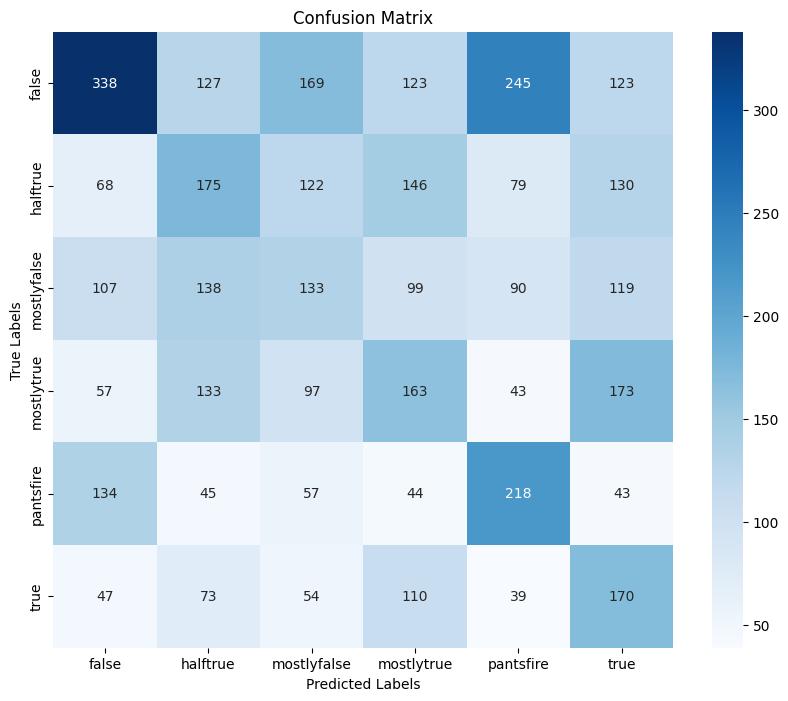

In [41]:
# Visualization
# Confusion Matrix
classes = ['false', 'halftrue', 'mostlyfalse',  'mostlytrue', 'pantsfire','true']

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Diagonal Values: The diagonal from top left to bottom right represents the number of instances where the predicted label matches the true label (i.e., true positives for each class). For example, there are 338 instances correctly predicted as 'false', 175 as 'halftrue', 133 as 'mostlyfalse', 163 as 'mostlytrue', 218 as 'pantsfire', and 170 as 'true'.


Off-Diagonal Values: These values represent misclassifications. For instance, there are 127 instances where 'false' was incorrectly predicted as 'halftrue', and 73 instances where 'true' was incorrectly predicted as 'halftrue'.


Color Intensity: The intensity of the color corresponds to the number of instances. Darker shades indicate higher numbers. This visualization suggests that 'pantsfire' and 'true' are the most correctly predicted classes, given the darker color in their respective diagonal cells.


Performance Insights: 

The model seems particularly good at identifying 'pantsfire' with 218 correct predictions, which is the highest count of correct predictions for a single class.
The model also confuses certain classes with one another quite often. For instance, there are substantial numbers of 'false' being confused with 'mostlyfalse' and 'halftrue'.
There is a relatively high number of 'mostlytrue' instances being misclassified as 'true' (110) and vice versa (54), indicating that the model may struggle to distinguish between these two closely related classes.
To further interpret this matrix, one would typically look at metrics like accuracy, precision, recall, and F1 score for each class. These values help in understanding the model's performance in a more nuanced way. For example, high precision means that when the model predicts a label, it is likely correct, while high recall means that the model is good at catching all instances of the label. F1 score balances the two, providing a single measure of performance for each class.

Based on this confusion matrix, you might want to investigate why certain classes are being confused and consider techniques for improving your model, such as feature engineering, resampling, or trying different models.

In [42]:
y_score = logistic_model.predict_proba(X_test) # Predict probabilities for each class
fpr = dict() # False Positive Rate
tpr = dict() # True Positive Rate
roc_auc = dict() # Area Under the Curve

# Compute ROC curve and ROC area for each class
for i in range(len(classes)):
    # Convert class labels to binary labels (1 for the current class, 0 for the rest)
    binary_labels = [1 if label == classes[i] else 0 for label in y_test]

    # Compute ROC curve and AUC for the current class
    fpr[classes[i]], tpr[classes[i]], _ = roc_curve(binary_labels, y_score[:, i])
    roc_auc[classes[i]] = auc(fpr[classes[i]], tpr[classes[i]])

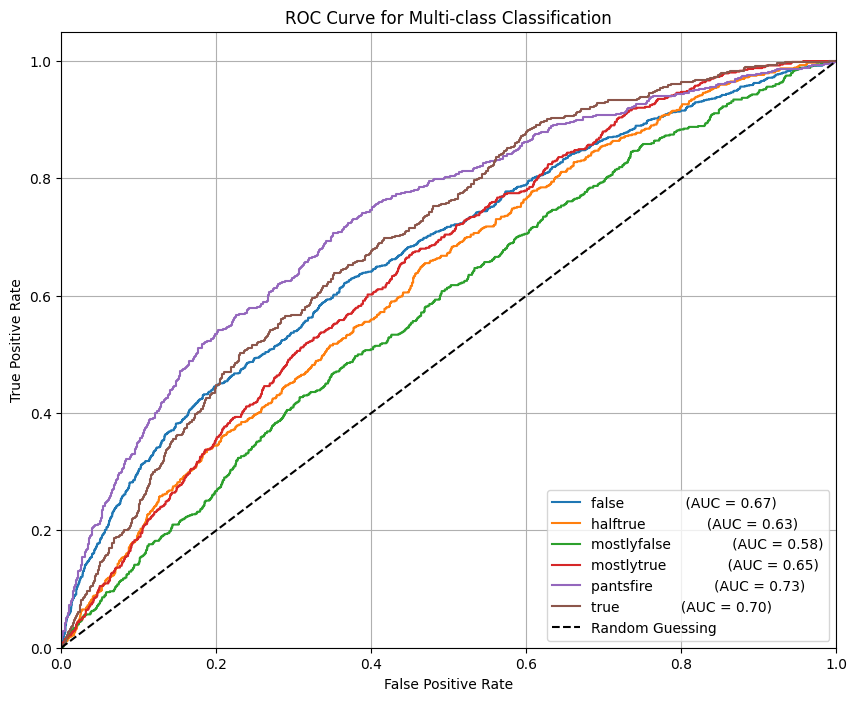

In [43]:
# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    plt.plot(fpr[classes[i]], tpr[classes[i]], label=f'{classes[i]} \
             (AUC = {roc_auc[classes[i]]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Analysis:

The class 'pantsfire' has the highest AUC (0.73), suggesting that the model is best at distinguishing this class from others.
The 'mostlyfalse' class has the lowest AUC (0.58), indicating the model has the most difficulty distinguishing this class from the others.
All classes have AUC values above 0.5, which means that the model performs better than random guessing for all classes.
The dashed line represents the performance of random guessing (AUC = 0.5). All ROC curves are above this line, which is positive.


General Insights:

The closer the ROC curve of a class is to the top-left corner, the more capable the model is of distinguishing that particular class.
A model with perfect performance would have a ROC curve that goes straight up the y-axis and then along the x-axis. The curves in this plot are not close to that, suggesting there's room for improvement.
The 'pantsfire' and 'true' classes, having higher AUC values, are relatively well-separated from other classes by the model. The other classes, particularly 'mostlyfalse', could benefit from further model tuning or additional informative features to improve their separation.

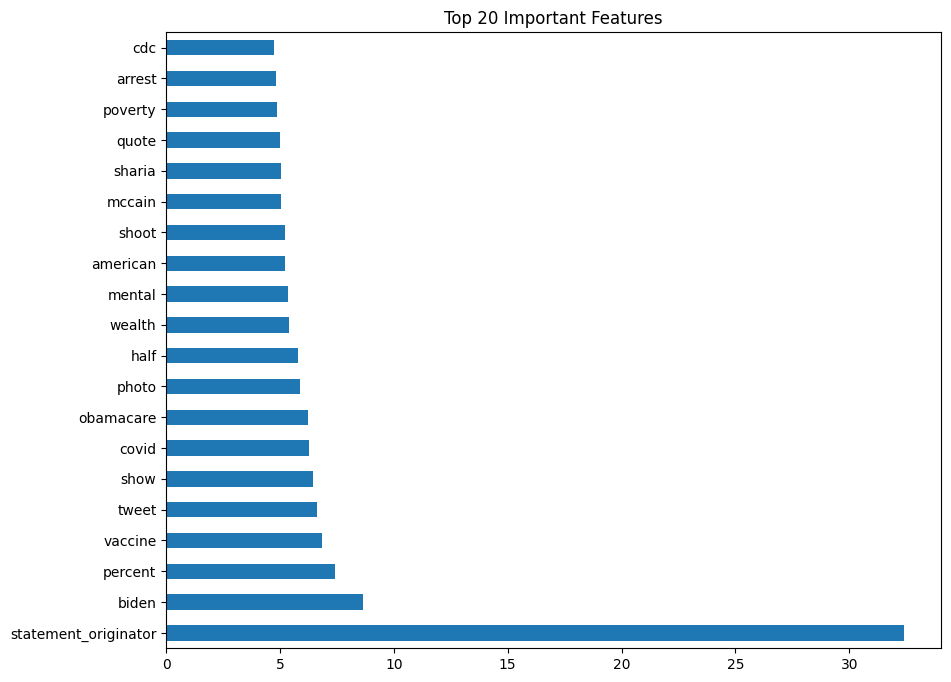

In [36]:
# Feature Importance Visualization for Multiclass
if logistic_model.classes_.size > 2:
    # Multiclass classification
    # Calculate the importance for each feature for each class
    importance = pd.DataFrame(data=logistic_model.coef_, columns=X_train.columns, index=[f'Class_{c}' for c in logistic_model.classes_])
    # Sum the absolute values to get an overall importance
    summed_importance = importance.abs().sum(axis=0).nlargest(20)
else:
    # Binary classification
    importance = pd.Series(logistic_model.coef_[0], index=X_train.columns)
    summed_importance = importance.abs().nlargest(20)

# Plot the feature importances
plt.figure(figsize=(10, 8))
summed_importance.plot(kind='barh')
plt.title('Top 20 Important Features')
plt.show()


Top 20 important features used in a predictive model. Each bar indicates the relative importance of a feature within the model, likely determined by a feature importance metric such as Gini importance from a decision tree-based model, or coefficients from a linear model.


Most Important Feature: The feature 'statement_originator' is the most significant one, suggesting that who makes a statement is highly predictive of the classification outcome.

Political Terms: Features like 'obamacare', 'biden', 'covid', 'vaccine', and 'sharia' suggest that political and health-related topics are important for the model. Their presence might be indicative of the political or pandemic context of the statements.

Social Issues: Terms like 'poverty', 'wealth', 'american', and 'mental' indicate that the model also finds social issues to be important in predicting the outcome.

Specificity and Relevance: Some features are very specific ('cdc', 'mccain', 'biden'), which could mean that the model might be picking up on the importance of current events or prominent figures in the news at the time the data was gathered.

Generic Terms: Words like 'percent', 'show', 'quote', and 'photo' are more generic and could be part of a variety of statements, yet their importance suggests they have a role in the context they're used within the dataset.

Measurement of Importance: Without context on how importance is measured, it's hard to determine if the scale is linear, logarithmic, or otherwise. Typically, these values are calculated based on how much a feature splits the data and reduces uncertainty.

Potential for Bias: The importance of certain features could also point to potential biases in the dataset or model. For example, if 'biden' is highly important, it could reflect a dataset focus on a specific time period or bias in the statements collected.
